# Task 1: Feature Selection Schemes

In this assignment you will understand Feature selection techniques

###Forward Selection: 
Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

###Backward Elimination: 
In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features.

###Recursive Feature elimination: 
It is a greedy optimization algorithm which aims to find the best performing feature subset. It repeatedly creates models and keeps aside the best or the worst performing feature at each iteration. It constructs the next model with the left features until all the features are exhausted. It then ranks the features based on the order of their elimination.

##Dataset
The dataset is available at "data/bank-full.csv" in the respective challenge's repo.
The dataset can be obtained from:
https://www.kaggle.com/sonujha090/bank-marketing

#Features (X)
##Input variables:
# bank client data:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16. emp.var.rate: employment variation rate. quarterly indicator (numeric)
17. cons.price.idx: consumer price index. monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index. monthly indicator (numeric)
19. euribor3m: euribor 3 month rate. daily indicator (numeric)
20. nr.employed: number of employees. quarterly indicator (numeric)

##Output variable (desired target):
21. y. has the client subscribed a term deposit? (binary: 'yes','no')

#### Objective
- To apply different feature selection approaches such as Forward Selection, Backward Elimination and recursive feature elimination for feature selection in Logistic Regression Algorithm.


#### Tasks
- Download and load the data (csv file)
- Process the data 
- Split the dataset into 70% for training and rest 30% for testing (sklearn.model_selection.train_test_split function)
- Train Logistic Regression
- Apply feature selection techniques
- Train the models on the feature reduced datasets
- Compare their accuracies and print feature subset

#### Further Fun
- Perform feature selection with other schemes in the Sklearn: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection|

#### Helpful links
- pd.get_dummies() and One Hot Encoding: https://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example
- Feature Scaling: https://scikit-learn.org/stable/modules/preprocessing.html
- Train-test splitting: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- Feature selection in ML: https://machinelearningmastery.com/feature-selection-machine-learning-python/
- Feature selection in sklearn: https://scikit-learn.org/stable/modules/feature_selection.html
- Use slack for doubts: https://join.slack.com/t/deepconnectai/shared_invite/zt-givlfnf6-~cn3SQ43k0BGDrG9_YOn4g




In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from sklearn import preprocessing

In [2]:
banking =  pd.read_csv('data/bank-full.csv')

In [3]:
banking.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [4]:
banking.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [5]:
banking.head(6)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no


In [6]:
banking.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
banking.shape

(45211, 17)

In [8]:
banking.rename(columns={"y":"Action"},inplace = True)

In [9]:
banking["Action"]

0         no
1         no
2         no
3         no
4         no
5         no
6         no
7         no
8         no
9         no
10        no
11        no
12        no
13        no
14        no
15        no
16        no
17        no
18        no
19        no
20        no
21        no
22        no
23        no
24        no
25        no
26        no
27        no
28        no
29        no
        ... 
45181     no
45182    yes
45183     no
45184     no
45185    yes
45186     no
45187    yes
45188    yes
45189     no
45190    yes
45191    yes
45192    yes
45193    yes
45194     no
45195    yes
45196    yes
45197    yes
45198     no
45199     no
45200    yes
45201    yes
45202    yes
45203    yes
45204    yes
45205    yes
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: Action, Length: 45211, dtype: object

In [10]:
#banking.Action.value_counts()

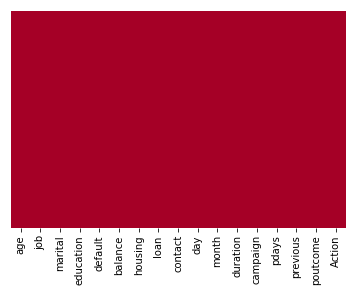

In [10]:
sns.heatmap(banking.isnull(),yticklabels = False, cbar = False , cmap ='RdYlGn')

In [11]:
new_data =  banking.select_dtypes(include='object')

In [12]:
#checking the number of uique categories in each column
# for i in new_data.columns:
#   print(i,';',new_data,'labels')
new_data.nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
Action        2
dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
new_data_encoded = new_data.apply(lb.fit_transform)
new_data_nonobject = banking.select_dtypes(exclude = ["object"])
banking1 = pd.concat([new_data_nonobject,new_data_encoded], axis = 1)

In [16]:
banking1.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,Action
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,2,8,3,0
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,2,8,3,0
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,2,8,3,0
3,47,1506,5,92,1,-1,0,1,1,3,0,1,0,2,8,3,0
4,33,1,5,198,1,-1,0,11,2,3,0,0,0,2,8,3,0


In [17]:
banking1.shape

(45211, 17)

# K Best Features

In [18]:
from sklearn.feature_selection import SelectKBest
from numpy import set_printoptions
from scipy.stats import chi2 
from sklearn.feature_selection import f_classif

In [19]:
X = banking1.drop('Action',axis=1)
y = banking1['Action']

In [20]:
X.shape

(45211, 16)

In [48]:
X1=X.columns
X1

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [21]:
Kbest = SelectKBest(score_func=f_classif, k=10)
kfit = Kbest.fit(X,y)

In [22]:
#scores = pd.DataFrame(kfit)

#columns = pd.DataFrame(Kbest)
set_printoptions(precision=3)
print(kfit.scores_)
features = kfit.transform(X)

print(features[0:10,:])

[  28.625  126.572   36.359 8333.761  243.358  490.697  396.444   74.048
   94.15   199.243   22.734  892.951  211.167 1017.966   27.09   275.597]
[[2143  261    1   -1    0    2    1    0    2    3]
 [  29  151    1   -1    0    1    1    0    2    3]
 [   2   76    1   -1    0    1    1    1    2    3]
 [1506   92    1   -1    0    3    1    0    2    3]
 [   1  198    1   -1    0    3    0    0    2    3]
 [ 231  139    1   -1    0    2    1    0    2    3]
 [ 447  217    1   -1    0    2    1    1    2    3]
 [   2  380    1   -1    0    2    1    0    2    3]
 [ 121   50    1   -1    0    0    1    0    2    3]
 [ 593   55    1   -1    0    1    1    0    2    3]]


In [ ]:
# Train logistic regression model with subset of features from K Best


In [33]:
from sklearn.linear_model import LogisticRegression,SGDClassifier, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



# Forward Selection

In [34]:
# Train a logistic regression model here
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
clf.coef_

array([[ 7.959e-03,  1.685e-05, -4.159e-03,  3.948e-03, -1.365e-01,
         2.233e-03,  7.011e-02, -7.723e-05,  2.305e-01,  1.656e-01,
        -2.638e-01, -1.057e+00, -7.130e-01, -5.992e-01]])

In [53]:
# Print the absolute weights of the model and sort them in descending order
weights= []

for i in clf.coef_[0]:
    print(i)
    weights.append(abs(i))

0.007959134638640111
1.6850003095014106e-05
-0.0041590917531342505
0.003948373935600433
-0.13649426180169486
0.0022327325877833505
0.07011183090498975
-7.72291805775974e-05
0.2304598024689818
0.165639263736445
-0.2638290765622207
-1.0570491466188965
-0.7130348044186863
-0.5992139983752761


In [57]:
X1

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [56]:
w={}
for i in range (0,len(weights)):
    w[X1[i]]=weights[i]
    
w

{'age': 0.007959134638640111,
 'balance': 1.6850003095014106e-05,
 'day': 0.0041590917531342505,
 'duration': 0.003948373935600433,
 'campaign': 0.13649426180169486,
 'pdays': 0.0022327325877833505,
 'previous': 0.07011183090498975,
 'job': 7.72291805775974e-05,
 'marital': 0.2304598024689818,
 'education': 0.165639263736445,
 'default': 0.2638290765622207,
 'housing': 1.0570491466188965,
 'loan': 0.7130348044186863,
 'contact': 0.5992139983752761}

In [58]:
fin = sorted(w.items(), key=lambda x: x[1])
fin

[('balance', 1.6850003095014106e-05),
 ('job', 7.72291805775974e-05),
 ('pdays', 0.0022327325877833505),
 ('duration', 0.003948373935600433),
 ('day', 0.0041590917531342505),
 ('age', 0.007959134638640111),
 ('previous', 0.07011183090498975),
 ('campaign', 0.13649426180169486),
 ('education', 0.165639263736445),
 ('marital', 0.2304598024689818),
 ('default', 0.2638290765622207),
 ('contact', 0.5992139983752761),
 ('loan', 0.7130348044186863),
 ('housing', 1.0570491466188965)]

In [59]:
# Run a for loop where each time you train a new model by adding features (from no of features 1 to n) 
# with highest weights (based on absolute weight from initial model) 
# Note you can choose features randomly also 

feature_subset=[]
accuracy_test=[]
accuracy_train=[]

for i in range(0,len(fin)):
    features=[]
    for j in range(i,len(fin)):
        features.append(fin[j][0])
    feature_subset.append(features) 
    X_present=X[features] 
    X_train, X_test, y_train, y_test = train_test_split(X_present, y, test_size=0.33,random_state=42)
    print(X_train.shape)
    logistic=LogisticRegression()
    logistic.fit(X_train,y_train)
    res_y=logistic.predict(X_test)
    accuracy_test.append(accuracy_score(y_test, res_y))
    res_y=logistic.predict(X_train)    
    accuracy_train.append(accuracy_score(y_train, res_y))

(30291, 14)
(30291, 13)
(30291, 12)
(30291, 11)
(30291, 10)
(30291, 9)
(30291, 8)
(30291, 7)
(30291, 6)
(30291, 5)
(30291, 4)
(30291, 3)
(30291, 2)
(30291, 1)


In [61]:
# Print the accuracies of all the models trained and names of the features used for each time
print("No Of Features","\t","Test Accuracy","\t","Train Accuracy")
for i in range (len(feature_subset)):
    print(len(feature_subset[i]),"\t",accuracy_test[i],"\t",accuracy_train[i])

No Of Features 	 Test Accuracy 	 Train Accuracy
14 	 0.888538873994638 	 0.8915849592288139
13 	 0.888538873994638 	 0.8915519461226107
12 	 0.8884718498659517 	 0.8915519461226107
11 	 0.8884048257372654 	 0.8910567495295633
10 	 0.8820375335120644 	 0.882473341916741
9 	 0.8821045576407507 	 0.882473341916741
8 	 0.8820375335120644 	 0.8823743025981314
7 	 0.8830428954423593 	 0.8830015516159916
6 	 0.8830428954423593 	 0.8830015516159916
5 	 0.8830428954423593 	 0.8830015516159916
4 	 0.8830428954423593 	 0.8830015516159916
3 	 0.8830428954423593 	 0.8830015516159916
2 	 0.8830428954423593 	 0.8830015516159916
1 	 0.8830428954423593 	 0.8830015516159916


In [ ]:
# Find a feature subset number where accuracy is maximum and number of features is minimum at the same time

# Backward Elimination

In [ ]:
# Train a logistic regression model here

In [ ]:
# Print the absolute weights of the model and sort them in ascending order

In [ ]:
# Run a for loop where each time you train a new model by removing features (from no of features n to 1) 
# with lowest weights (based on absolute weight from initial model) 
# Note you can choose features randomly also 

In [ ]:
# Print the accuracies of all the models trained and names of the features used for each time

In [ ]:
# Find a feature subset number where accuracy is maximum and number of features is minimum at the same time

# Recursive Feature Elimination. 
Recursive Feature Elimination (RFE) as its title suggests recursively removes features, builds a model using the remaining attributes and calculates model accuracy. 


In [ ]:
X = banking1.iloc[:,0:16]
y = banking1.iloc[:,16]
logit = LogisticRegression()

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(?,?, test_size = ?, random_state = 10)

In [ ]:
rfe = RFE(estimator=?, step=1)
rfe = rfe.fit(?,?)

In [ ]:
cols = pd.DataFrame(?)
ranking = pd.DataFrame(rfe.ranking_)

In [ ]:
rankings_of_features = pd.concat([cols,ranking],axis = 1)

In [ ]:
rankings_of_features

In [ ]:
rankings_of_features.columns = [?,?]

In [ ]:
rankings_of_features

In [ ]:
print(rankings_of_features.nlargest(5,'rank'))
#remember this gives wrong results

In [ ]:
rankings_of_features.sort_values(by='rank')

In [ ]:
#replace your X_train,X_test with new training data(the one which contains most impactful features)
X_trainRFE = rfe.transform(?)
X_testRFE = rfe.transform(?)

In [ ]:
model = logit.fit(?,?)

In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [ ]:
logit.predict(X_testRFE)

In [ ]:
score = logit.score(X_testRFE, y_test)
print(score)

# RFE using cross validation

In [ ]:
rfecv = RFECV(estimator=logit, step=1, cv=5, scoring='accuracy')
rfecv = rfecv.fit(?, ?)

In [ ]:
rfecv.grid_scores_

In [ ]:
X_train_rfecv = rfecv.transform(?)
X_test_rfecv = rfecv.transform(?)

In [ ]:
model = logit.fit(?,?)

In [ ]:
logit.predict(?)


In [ ]:
logit.score(?,?)
print(score)